<a href="https://colab.research.google.com/github/bayuryunarko/belajar-sklearn/blob/main/8_Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Latihan SKLearn dari channel Youtube "Indonesia Belajar"

##Classification Task dengan Support Vector Machine (SVM)

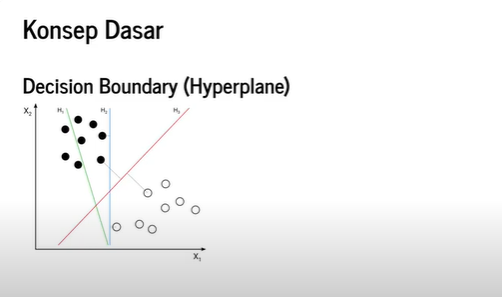

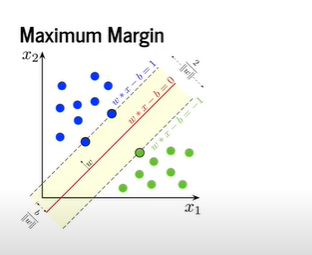

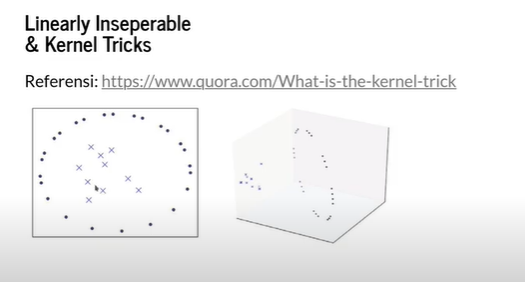

- Referensi Support Vector Machine: https://www.svm-tutorial.com/
- Referensi Kernel Tricks: https://www.quora.com/What-is-the-kernel-trick?share=1
- Referensi Hyperparameter Tuning: https://en.wikipedia.org/wiki/Hyperparameter_optimization

##Dataset : The MNIST database of handwritten digits

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y= True)
X.shape

(70000, 784)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

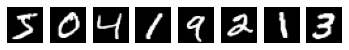

In [4]:
pos = 1
for data in X[:8]:
  plt.subplot(1, 8, pos)
  plt.imshow(data.reshape((28,28)),
             cmap= cm.Greys_r)
  plt.axis('off')
  pos += 1

plt.show()

In [5]:
y[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

In [9]:
# X_train = X[:60000]
# y_train = X[:60000]
# X_test = X[60000:]
# y_test = X[60000:]

X_train = X[:1000]
y_train = y[:1000]
X_test = X[69000:]
y_test = y[69000:]

##Classification dengan SVC (Support Vector Classifier)

In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
from sklearn.metrics import classification_report

In [16]:
y_pred = model.predict(X_test)
print(f'Classification Report : \n{classification_report(y_test, y_pred)}')

Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       102
           1       0.97      0.99      0.98       119
           2       0.85      0.82      0.84        99
           3       0.97      0.87      0.92       102
           4       0.88      0.95      0.91        92
           5       0.91      0.86      0.88        85
           6       0.93      0.95      0.94       102
           7       0.92      0.94      0.93       115
           8       0.89      0.94      0.91        94
           9       0.92      0.84      0.88        90

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



##Hyperparameter Tuning dengan GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

In [19]:
parameters = {
    'kernel' : ['rbf', 'poly', 'sigmoid'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=2,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   29.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:  3.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [20]:
print(f'Best score : {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print('Best parameters :')
for param in parameters:
  print(f'\t{param} : {best_params[param]}')

Best score : 0.907
Best parameters :
	kernel : rbf
	C : 10
	gamma : scale


##Predict & Evaluate

In [21]:
y_pred = grid_search.predict(X_test)

print(f'Classification Report : \n{classification_report(y_test, y_pred)}')

Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.98      0.99      0.98       119
           2       0.87      0.85      0.86        99
           3       0.99      0.89      0.94       102
           4       0.91      0.95      0.93        92
           5       0.92      0.89      0.90        85
           6       0.93      0.94      0.94       102
           7       0.93      0.93      0.93       115
           8       0.89      0.95      0.92        94
           9       0.92      0.88      0.90        90

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000

